In [3]:
import sys
import pyodbc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta
from statsmodels.tsa.holtwinters import ExponentialSmoothing
plt.style.use('fivethirtyeight')

df = pd.read_csv("MonthWiseSalesSum2.csv")
print("Connection established and Data read from database")

months_forecast = 14
forecast_start_date = "2019-08-01"
date_format = "%Y-%m-%d"

df['Month'] = pd.to_datetime(df["Month"])
df.set_index("Month",inplace=True)
df.index = pd.DatetimeIndex(df.index.values, freq=df.index.inferred_freq)

train, test = df.iloc[:43, 0], df.iloc[42:, 0]

model = ExponentialSmoothing(train, trend="add", damped=False, seasonal="add", seasonal_periods=12).fit()

end_of_predict = test.index[-1]+months_forecast
pred = model.predict(start=test.index[0],end=end_of_predict)

out_df = pd.DataFrame({'Month': np.array(df.index), 'Sales': np.array(df["Sales"])})
out_df["Month"] = pd.to_datetime(out_df["Month"])
out_df = out_df.set_index(["Month"])
out_df.index = pd.DatetimeIndex(out_df.index.values, freq=train.index.inferred_freq)

start = pd.datetime.strptime("2019-07-01", "%Y-%m-%d")
date_list = [start + relativedelta(months=x) for x in range(0,months_forecast)]
future = pd.DataFrame(index=date_list, columns= out_df.columns)
out_df = pd.concat([out_df, future])

forecast_final_array = [None] * 42
pred = np.array(pred)
for i in pred:
    forecast_final_array.append(i)
out_df["Forecast"] = forecast_final_array
out_df["Dates"] = out_df.index

Connection established and Data read from database


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`


In [4]:
out_df

,Sales,Forecast,Dates
2016-01-01,18172,NaN,2016-01-01
2016-02-01,11954,NaN,2016-02-01
2016-03-01,38732,NaN,2016-03-01
2016-04-01,34198,NaN,2016-04-01
2016-05-01,30137,NaN,2016-05-01
2016-06-01,24800,NaN,2016-06-01
2016-07-01,28765,NaN,2016-07-01
2016-08-01,36899,NaN,2016-08-01
2016-09-01,64601,NaN,2016-09-01
2016-10-01,31406,NaN,2016-10-01


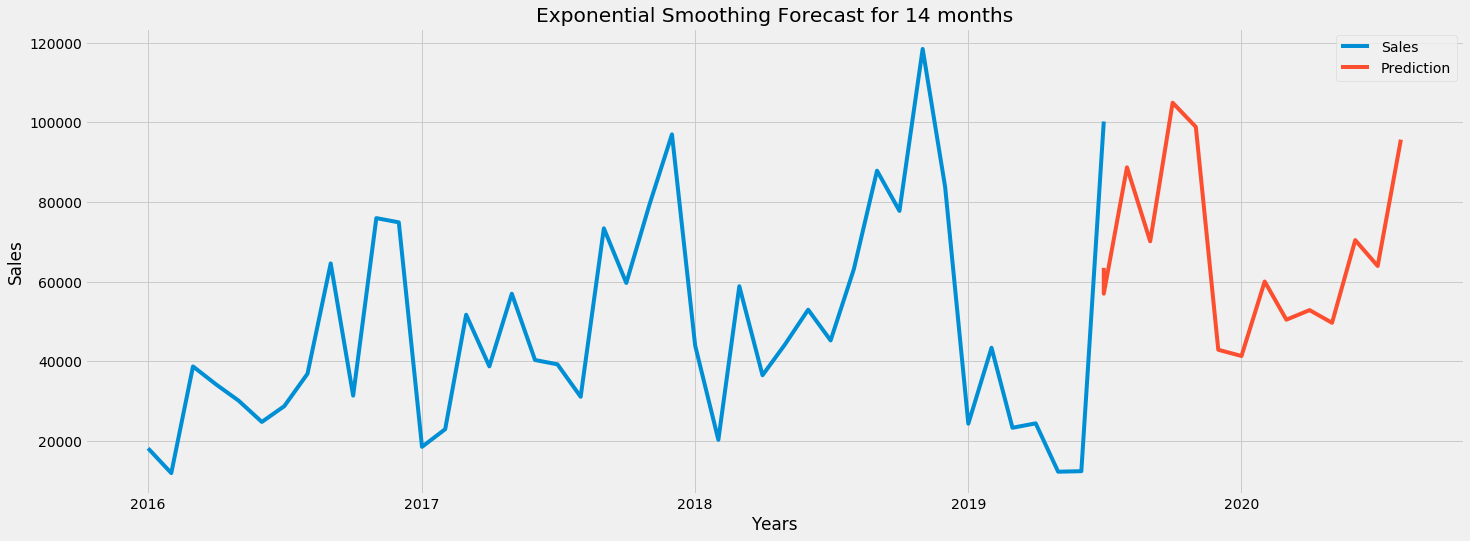

In [13]:
plt.figure(figsize=(22,8))
plt.plot(out_df.index, out_df.Sales, label="Sales")
plt.plot(out_df.index, out_df.Forecast, label="Prediction")
plt.legend(loc="best")
plt.xticks(fontsize=18)
plt.xticks(fontsize=14)
plt.xlabel("Years")
plt.ylabel("Sales")
plt.title("Exponential Smoothing Forecast for "+str(months_forecast)+" months")
plt.show()